In [1]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Toy Example for the MDLP Splitting

In [68]:
full = [ 0, 0, 0, 0, 1, 0, 1, 1, 1]

for idx in range(1, len(full)):
    s1 = np.bincount(full[:idx], minlength=2)
    s2 = np.bincount(full[idx:], minlength=2)
    s = np.bincount(full, minlength=2)
    print "Split arrays: ", full[:idx], full[idx:]
    print "Entropy S_1: {}\nEntropy S_2: {}".format(st.entropy(s1), st.entropy(s2))
    print "Information Gain: ", st.entropy(s) - st.entropy(s1) * s1.sum()/s.sum() - st.entropy(s2)  * s2.sum()/s.sum()
    print '\n'

Split arrays:  [0] [0, 0, 0, 1, 0, 1, 1, 1]
Entropy S_1: 0.0
Entropy S_2: 0.69314718056
Information Gain:  0.0708307494329


Split arrays:  [0, 0] [0, 0, 1, 0, 1, 1, 1]
Entropy S_1: 0.0
Entropy S_2: 0.6829081047
Information Gain:  0.155810828497


Split arrays:  [0, 0, 0] [0, 1, 0, 1, 1, 1]
Entropy S_1: 0.0
Entropy S_2: 0.636514168295
Information Gain:  0.262618797734


Split arrays:  [0, 0, 0, 0] [1, 0, 1, 1, 1]
Entropy S_1: 0.0
Entropy S_2: 0.500402423538
Information Gain:  0.408960230187


Split arrays:  [0, 0, 0, 0, 1] [0, 1, 1, 1]
Entropy S_1: 0.500402423538
Entropy S_2: 0.562335144619
Information Gain:  0.159033499246


Split arrays:  [0, 0, 0, 0, 1, 0] [1, 1, 1]
Entropy S_1: 0.450561208866
Entropy S_2: 0.0
Information Gain:  0.386587437353


Split arrays:  [0, 0, 0, 0, 1, 0, 1] [1, 1]
Entropy S_1: 0.598269588585
Entropy S_2: 0.0
Information Gain:  0.221640785475


Split arrays:  [0, 0, 0, 0, 1, 0, 1, 1] [1]
Entropy S_1: 0.661563238158
Entropy S_2: 0.0
Information Gain:  0.098905

# Toy Example for the Correlation Splits

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import scipy.stats as st

data, target = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)
sort_idx = np.argsort(data.squeeze())
data, target = np.round(data.squeeze()[sort_idx],2), target[sort_idx]

print 'data:   ', data
print 'target: ', target
print '\n'

for idx in range(1, len(data)-1):
    t = data[idx]
    s1 = (data <= t).astype(np.int32)
    c, p = st.pearsonr(s1, target)
    print "Split: {}".format(t)
    print "Class Assignment: {}".format(s1)
    print "Pearson r: {0:1.2f}\np-value: {1:1.3f}".format(c, 1-p)
    print '\n'

data:    [-1.97 -1.41 -1.32 -0.91 -0.85  0.    0.51  0.66  1.15  1.3 ]
target:  [0 0 0 0 0 1 1 1 1 1]


Split: -1.41
Class Assignment: [1 1 0 0 0 0 0 0 0 0]
Pearson r: -0.50
p-value: 0.859


Split: -1.32
Class Assignment: [1 1 1 0 0 0 0 0 0 0]
Pearson r: -0.65
p-value: 0.960


Split: -0.91
Class Assignment: [1 1 1 1 0 0 0 0 0 0]
Pearson r: -0.82
p-value: 0.996


Split: -0.85
Class Assignment: [1 1 1 1 1 0 0 0 0 0]
Pearson r: -1.00
p-value: 1.000


Split: 0.0
Class Assignment: [1 1 1 1 1 1 0 0 0 0]
Pearson r: -0.82
p-value: 0.996


Split: 0.51
Class Assignment: [1 1 1 1 1 1 1 0 0 0]
Pearson r: -0.65
p-value: 0.960


Split: 0.66
Class Assignment: [1 1 1 1 1 1 1 1 0 0]
Pearson r: -0.50
p-value: 0.859


Split: 1.15
Class Assignment: [1 1 1 1 1 1 1 1 1 0]
Pearson r: -0.33
p-value: 0.653




# Example to show overfitting and evaluate MDLP & CIP Performance

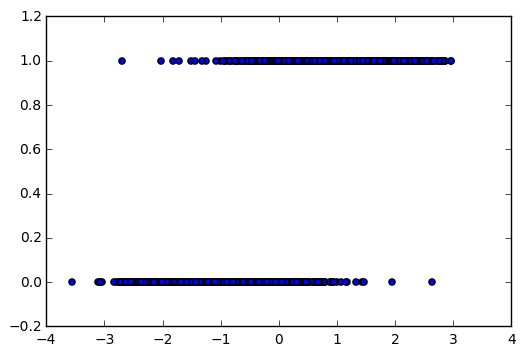

In [13]:
data, target = make_classification(n_classes=2, n_clusters_per_class=1, n_features=1, n_redundant=0, n_informative=1, n_samples=5000, random_state=42)
plt.scatter(data, target)

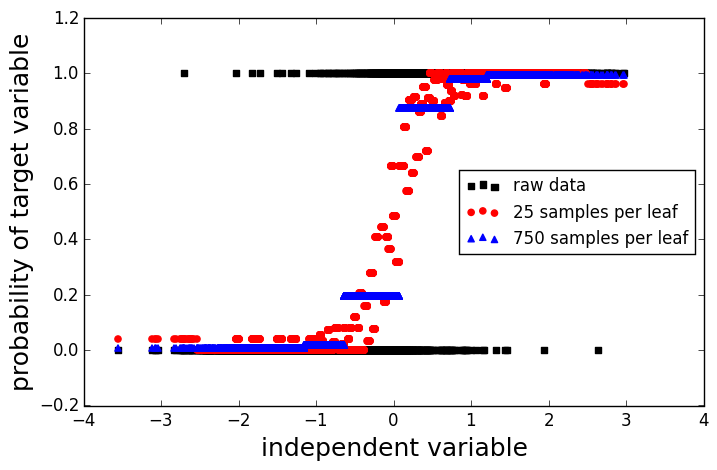

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=25)
dtc.fit(data, target)

proba_1 = dtc.predict_proba(data)[:, 1]

dtc_2 = DecisionTreeClassifier(min_samples_leaf=750)
dtc_2.fit(data, target)

proba_2 = dtc_2.predict_proba(data)[:, 1]


fig = plt.figure(figsize=(8,5))
plt.scatter(data, target, color='k', marker='s', label='raw data')
plt.scatter(data, proba_1, c='r', edgecolor='r', marker='o', label='25 samples per leaf')
plt.scatter(data, proba_2, c='b', edgecolor='b', marker='^', label='750 samples per leaf')
plt.legend(loc='center right')
plt.xlabel('independent variable', fontsize=18)
plt.ylabel('probability of target variable', fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.savefig('/Users/jotterbach/code/personal_github/jotterbach.github.io/resources/recursive_partitioning_blog/decision_tree_clf.png')

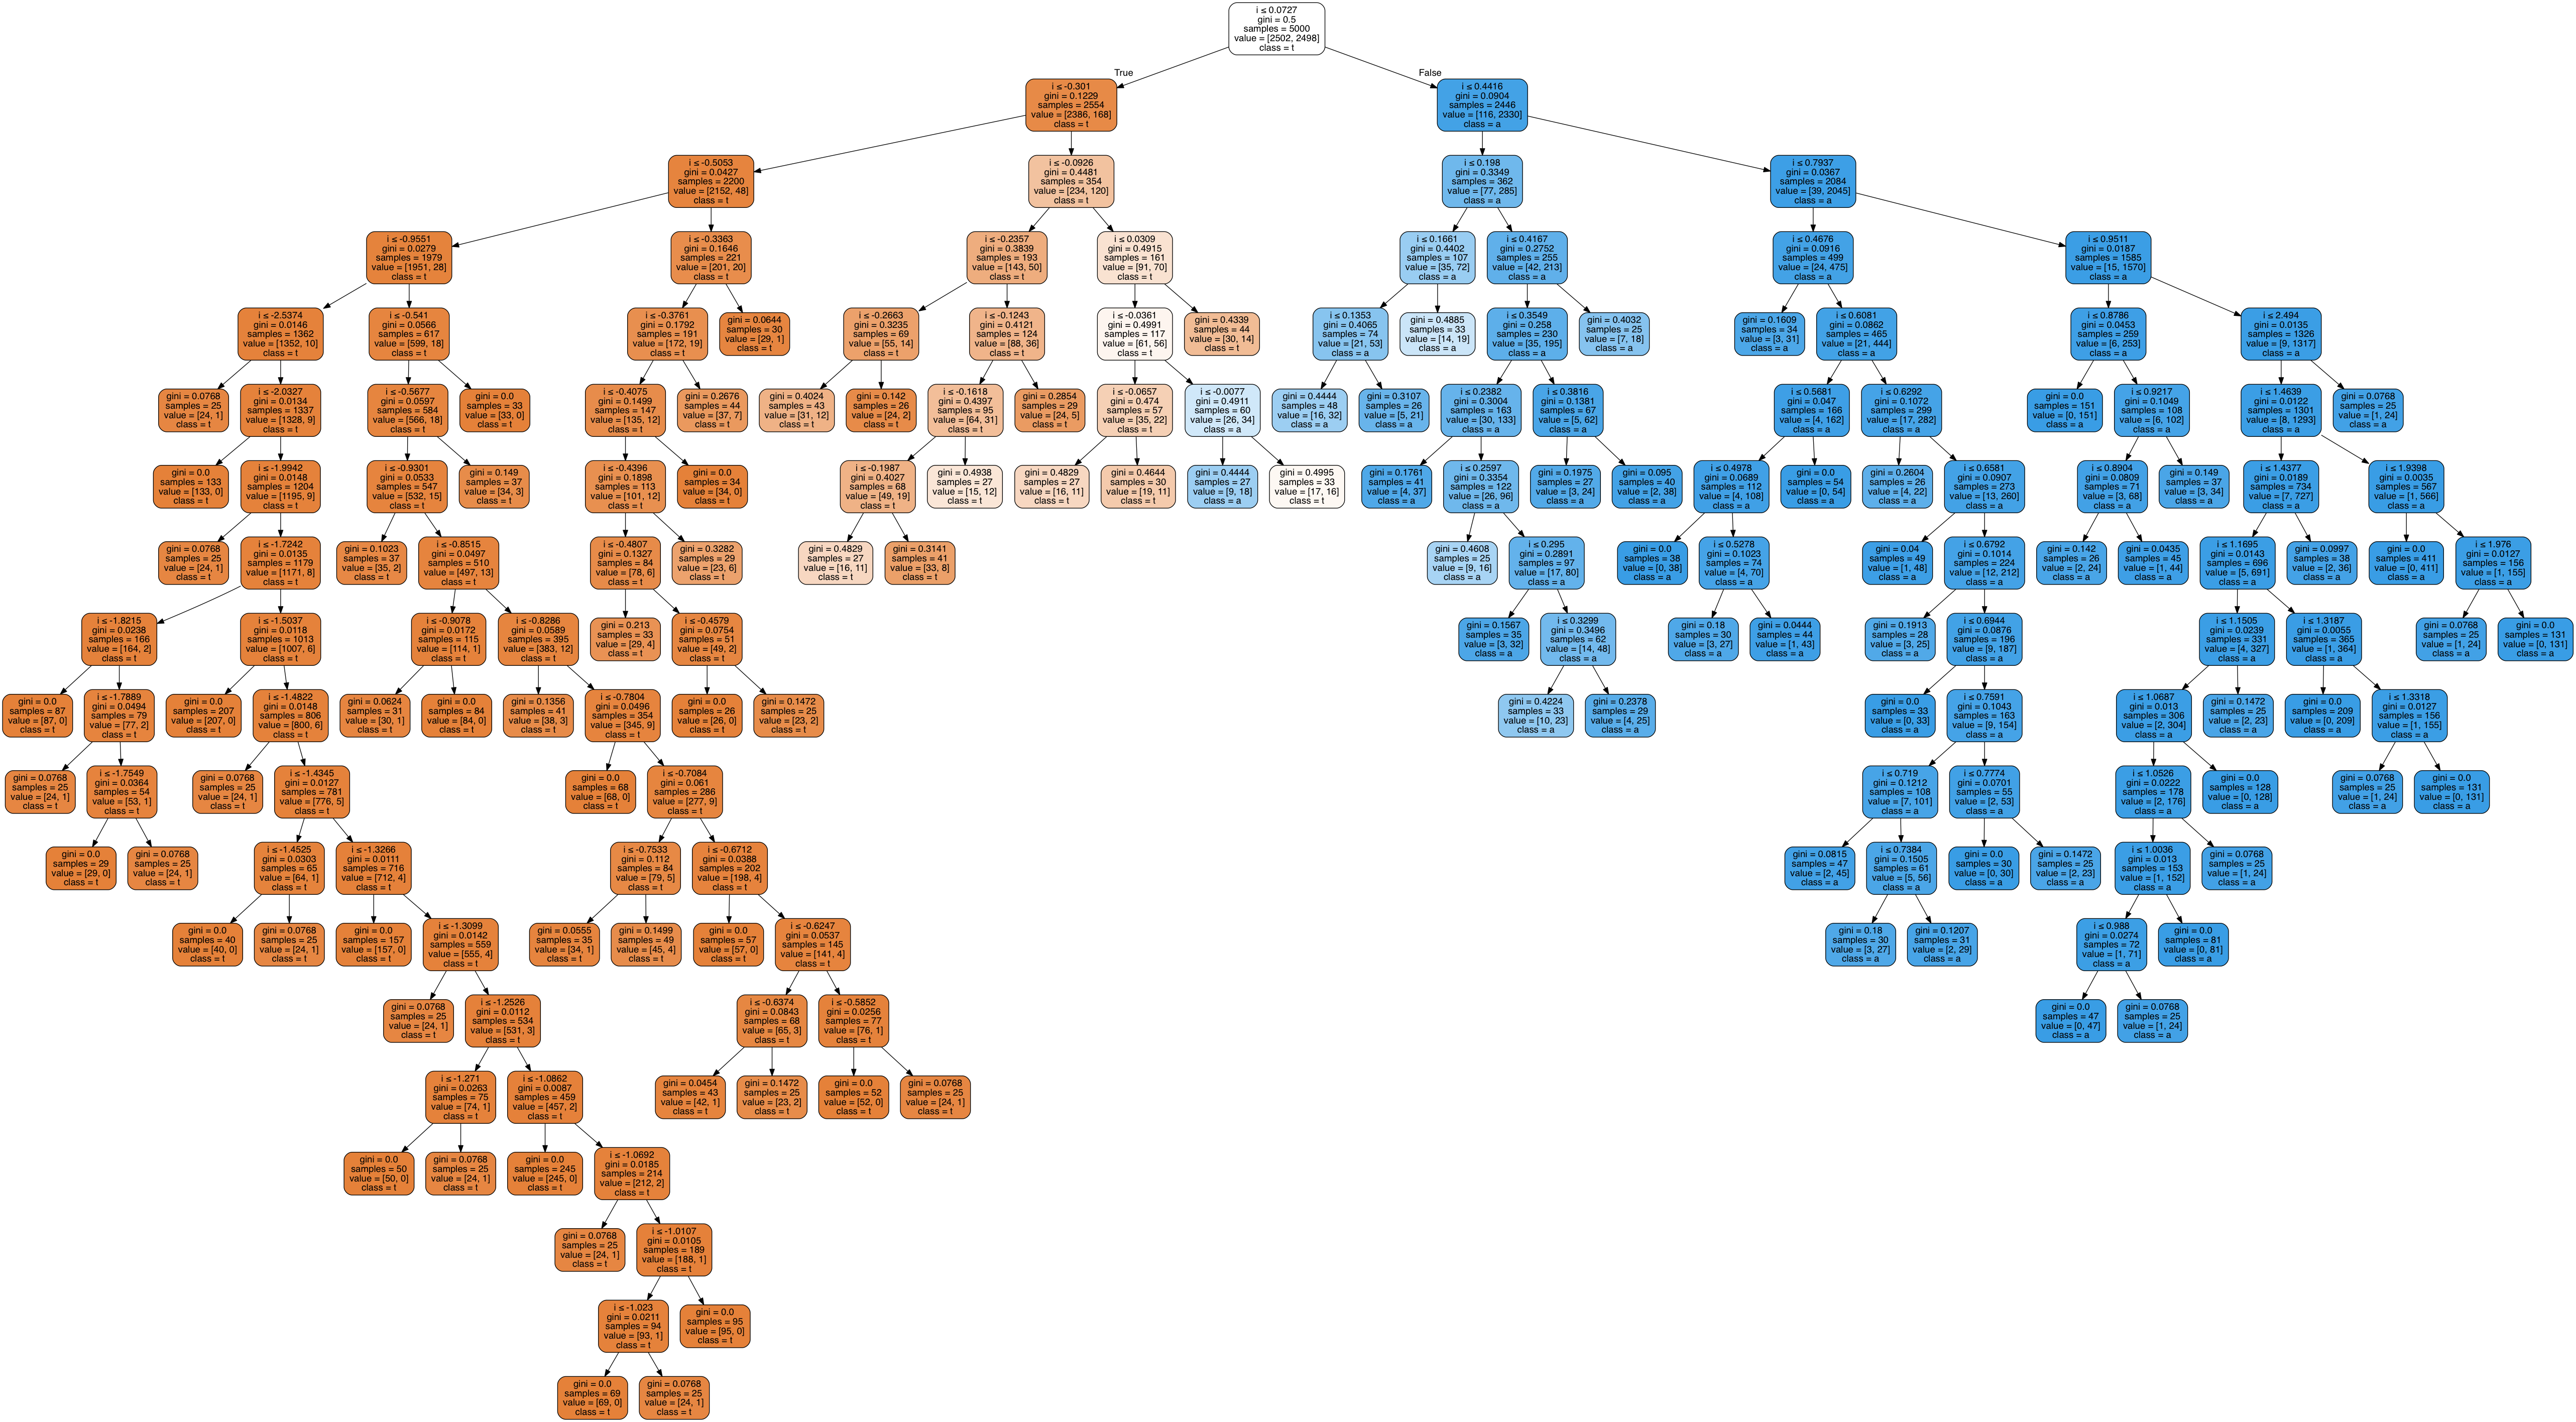

In [15]:
from sklearn import tree
import pydotplus 
from IPython.display import Image  

dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names='iv',  
                         class_names='target',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [16]:
with open('/Users/jotterbach/code/personal_github/jotterbach.github.io/resources/recursive_partitioning_blog/decision_tree_overfit_branching.png', 'w') as f:
    f.write(graph.create_png())

In [17]:
%autoreload
from DSTK.FeatureBinning import ConditionalInferenceBinner

cib = ConditionalInferenceBinner('CIB @ 0.95', alpha=.95)
cib.fit(data.squeeze(), target)

<= -0.95542538166: [ 0.99265786  0.00734214]
<= -0.505737125874: [ 0.97082658  0.02917342]
<= -0.301030486822: [ 0.90950226  0.09049774]
<= -0.0930392965674: [ 0.74093264  0.25906736]
<= 0.0724654719234: [ 0.56521739  0.43478261]
<= 0.197587713599: [ 0.3271028  0.6728972]
<= 0.441624552011: [ 0.16470588  0.83529412]
<= 0.793667197227: [ 0.04809619  0.95190381]
<= inf: [ 0.00946372  0.99053628]
NaN: [ 0.5004  0.4996]

In [18]:
cib_2 = ConditionalInferenceBinner('CIB @ 0.5', alpha=.5)
cib_2.fit(data.squeeze(), target)

<= -2.69868469238: [ 0.92857143  0.07142857]
<= -0.95542538166: [ 0.99332344  0.00667656]
<= -0.505737125874: [ 0.97082658  0.02917342]
<= -0.301030486822: [ 0.90950226  0.09049774]
<= -0.0930392965674: [ 0.74093264  0.25906736]
<= 0.0724654719234: [ 0.56521739  0.43478261]
<= 0.100235559046: [ 0.19047619  0.80952381]
<= 0.197587713599: [ 0.36046512  0.63953488]
<= 0.441624552011: [ 0.16470588  0.83529412]
<= 0.793667197227: [ 0.04809619  0.95190381]
<= 0.878775835037: [ 0.00657895  0.99342105]
<= 0.88977175951: [ 0.  1.]
<= 0.950512647629: [ 0.04938272  0.95061728]
<= 0.951026797295: [ 0.5  0.5]
<= inf: [ 0.00678733  0.99321267]
NaN: [ 0.5004  0.4996]

In [19]:
from DSTK.FeatureBinning import DecisionTreeBinner

dtb = DecisionTreeBinner('MDLP', mdlp=True)
dtb.fit(data.squeeze(), target)

<= -0.851487278938: [ 0.99141347  0.00858653]
<= -0.31787276268: [ 0.94985251  0.05014749]
<= 0.0727043300867: [ 0.66574586  0.33425414]
<= 0.467639029026: [ 0.2020202  0.7979798]
<= 0.951149404049: [ 0.03729282  0.96270718]
<= inf: [ 0.00678733  0.99321267]
NaN: [ 0.5004  0.4996]

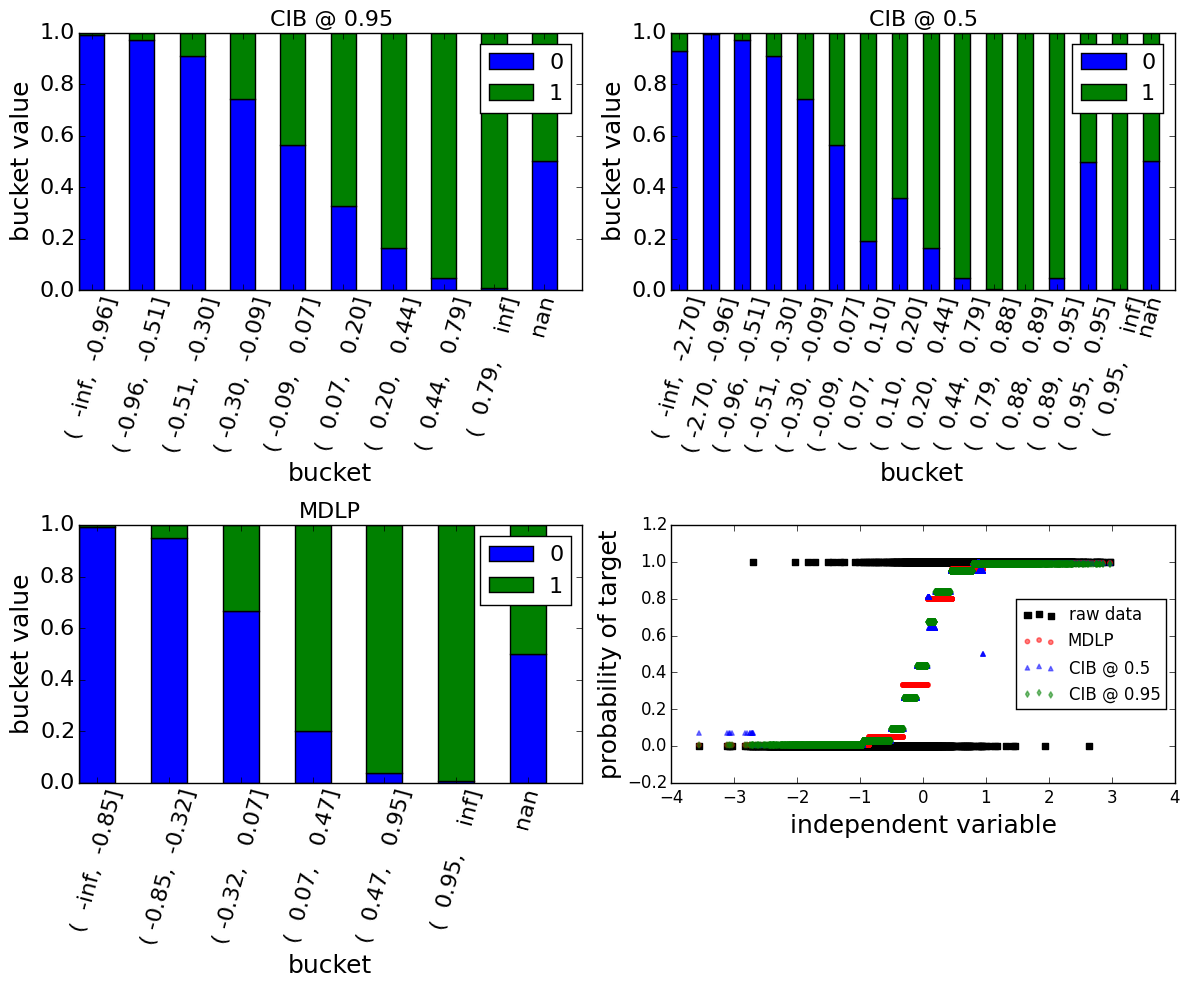

In [22]:
from DSTK.FeatureBinning import plotting as p

fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
p.plot_binner(cib)

plt.subplot(2,2,2)
p.plot_binner(cib_2)

plt.subplot(2,2,3)
p.plot_binner(dtb)

plt.subplot(2,2,4)
plt.scatter(data, target, c='k', marker='s', label='raw data')

plt.scatter(data, dtb.transform(data.squeeze()), c='r', edgecolor='r', marker='o', alpha=0.5, s=10, label='MDLP')
plt.scatter(data, cib_2.transform(data.squeeze()), c='b', edgecolor='b', marker='^', alpha=0.5, s=10, label='CIB @ 0.5')
plt.scatter(data, cib.transform(data.squeeze()), c='g', edgecolor='g', marker='d', alpha=0.5, s=10, label='CIB @ 0.95')
plt.xlabel('independent variable', fontsize=18)
plt.ylabel('probability of target', fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.legend(loc='center right')

plt.tight_layout()

plt.savefig('/Users/jotterbach/code/personal_github/jotterbach.github.io/resources/recursive_partitioning_blog/mdlp_cip_perf.png')